1. Import dependencies and data

In [ ]:
!pip install tensorflow tensorflow-gpu matplotlib ipywidgets tensorflow-datasets

In [ ]:
!pip list

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print(gpu)
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

c:\Onedrive\Desktop\Projects\GAN\gan_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
ds = tfds.load('fashion_mnist', split="train")

In [17]:
ds.as_numpy_iterator().next()['label']

2

2. Viz Data and Build dataset

In [18]:
import numpy as np

In [19]:
dataiterator = ds.as_numpy_iterator()

In [24]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [134],
         [171],
         [132],
         [138],
         [137],
         [129],
         [130],
         [168],
         [153],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [241],
         [243],
         [226],
         [224],
         [227],
         [230],
         [237],
         [240],
         [246],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


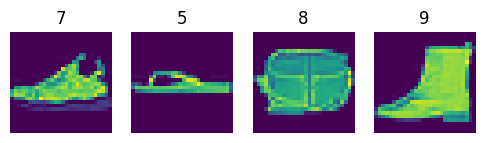

In [79]:
fig, ax = plt.subplots(ncols = 4, figsize=(6, 6))
for idx in range(4):
    sample_data = dataiterator.next()
    image = sample_data['image']
    label = sample_data['label']
    ax[idx].imshow(np.squeeze(image))
    ax[idx].set_title(label)
    ax[idx].axis('off')

In [61]:
def scale_images(data):
    image = data['image']
    return image / 255

map
cache
shuggle
batch
prefetch

In [88]:
#Fetching dataset
ds = tfds.load('fashion_mnist', split='train')
#Mapping the scale_images function to scale the images
ds =  ds.map(scale_images)
#Caching the dataset for that batch
ds = ds.cache()
#Shuffling dataset
ds = ds.shuffle(60000)
#Batching into 128 images per sample
ds = ds.batch(128)
# Reduces likelihood of bottlenecking
ds = ds.prefetch(64)

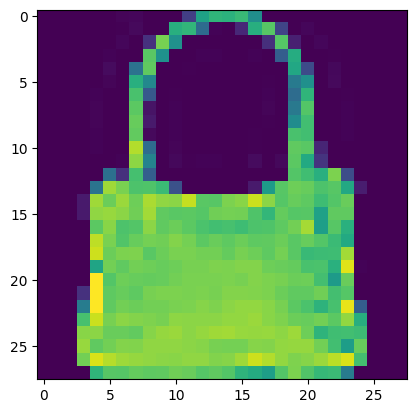

In [76]:
plt.imshow(np.squeeze(ds.as_numpy_iterator().next()[0]))

3. Build Neural Network

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [122]:
def build_generator():
    model = Sequential()

    #Takes in random values and reshape into 7x7x128
    #Beginning of generated image
    model.add(Dense(128 * 7 * 7, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7, 7, 128)))

    #Upsampling block
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # model.add(UpSampling2D())
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))

    return model

In [208]:
generator = build_generator()

In [130]:
generator.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_11 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_15 (UpSampli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

1/1 [==============================] - 0s 86ms/step


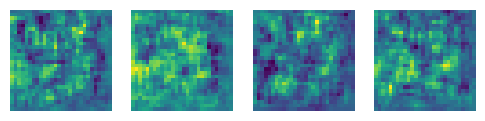

In [151]:
img = generator.predict(np.random.randn(4, 128, 1))

fig, ax = plt.subplots(ncols = 4, figsize=(6, 6))
for idx in range(4):
    sample_data = img[idx]
    image = sample_data
    ax[idx].imshow(np.squeeze(image))
    ax[idx].axis('off')

In [159]:
def build_discriminator():
    model = Sequential()

    model.add(Conv2D(32, 5, input_shape=(28, 28, 1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4)) # Add regularization

    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))

    return model

In [207]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_15 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_49 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_16 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 16, 16, 128)     

In [169]:
img = generator.predict(np.random.randn(4, 128, 1))
discriminator.predict(img)

1/1 [==============================] - 0s 26ms/step


array([[0.5005766],
       [0.5005311],
       [0.500574 ],
       [0.5005379]], dtype=float32)

4. Construct training loop

In [221]:
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [222]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [173]:
from tensorflow.keras.models import Model

In [234]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.generator = generator
        self.discriminator = discriminator

        pass
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        super().compile(*args, **kwargs)

        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

        # self.g_opt.build(self.generator.trainable_variables)
        # self.d_opt.build(self.discriminator.trainable_variables)
        

        pass
    def train_step(self, batch):
        #Get data
        real_images = batch
        fake_image = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        #Train discriminator
        with tf.GradientTape() as d_tape:
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_image, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis = 0)

            noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))

            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        with tf.GradientTape() as g_tape:
            gen_images = self.generator(tf.random.normal((128, 128, 1)), training=True)
            
            predicted_labels = self.discriminator(gen_images, training=False)
            
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # self.d_opt.build(self.discriminator.trainable_variables)
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}
        pass
    def test_step(self):
        pass

In [235]:
fashiongan = FashionGAN(generator, discriminator)

In [236]:
fashiongan.compile(g_opt, d_opt, g_loss, d_loss)

In [177]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [233]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [237]:
# ds.as_numpy_iterator().next()
hist = fashiongan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20


203/469 [===========>..................] - ETA: 50:07 - d_loss: 0.5831 - g_loss: 0.7145

KeyboardInterrupt: 